<a href="https://colab.research.google.com/github/malaika02/Face_Mask_Detection/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('dataset extracted')

dataset extracted


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_file = os.listdir('/content/data/with_mask')
print(with_mask_file[1:5])

['with_mask_1870.jpg', 'with_mask_287.jpg', 'with_mask_1206.jpg', 'with_mask_2766.jpg']


In [ ]:
without_mask_file = os.listdir('/content/data/without_mask')
print(without_mask_file[1:5])

['without_mask_114.jpg', 'without_mask_2585.jpg', 'without_mask_625.jpg', 'without_mask_1718.jpg']


In [ ]:
print(len(with_mask_file))
print(len(without_mask_file))

3725
3828


In [ ]:
#creating lables   0 without mask    with mask 1

with_mask_label = [1] * 3725
without_mask_label = [0]*3828

In [ ]:
labels = with_mask_label + without_mask_label

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


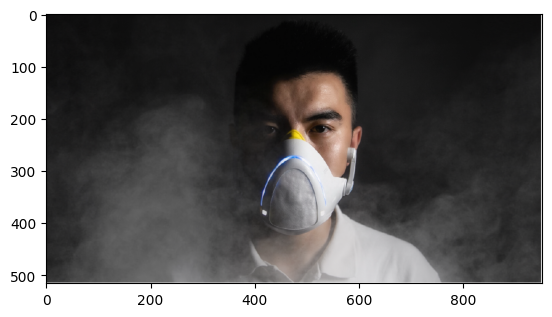

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_3382.jpg')
imgplot = plt.imshow(img)
plt.show()

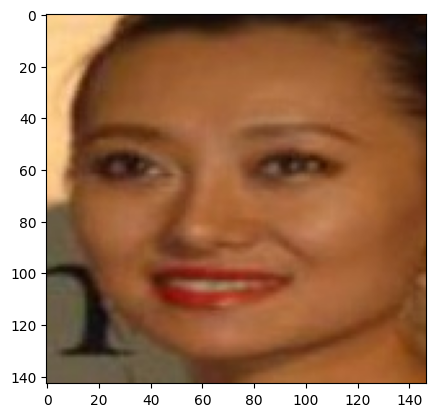

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_3694.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
dir = '/content/data/with_mask/'

dataa = []

for img_path in with_mask_file:
  image = Image.open(dir + img_path)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  dataa.append(image)

dir = '/content/data/without_mask/'


for img_path in without_mask_file:
  image = Image.open(dir+img_path)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  dataa.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
print(type(dataa))

<class 'list'>


In [ ]:
X = np.array(dataa)
y = np.array(labels)

In [ ]:
print(X.shape)

(7553, 128, 128, 3)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#X_train scaled

X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train.shape

(6042, 128, 128, 3)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,BatchNormalization,MaxPooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
datagen = ImageDataGenerator(
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.3,
    zoom_range=0.3
)
datagen.fit(X_train)

In [ ]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(128,128,3),kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True,verbose=1)

In [ ]:
history = model.fit(X_train,y_train,batch_size=32,epochs=20,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 30s 81ms/step - accuracy: 0.8040 - loss: 2.1925 - val_accuracy: 0.4964 - val_loss: 3.6974
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.8560 - loss: 1.1587 - val_accuracy: 0.6492 - val_loss: 1.0543
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8966 - loss: 0.7633 - val_accuracy: 0.6393 - val_loss: 1.1679
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9167 - loss: 0.5687 - val_accuracy: 0.8928 - val_loss: 0.5530
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9289 - loss: 0.4673 - val_accuracy: 0.9159 - val_loss: 0.4453
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9413 - loss: 0.3534 - val_accuracy: 0.9067 - val_loss: 0.4139
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.9500 - loss: 0.2870 - val_accuracy: 0.9126 - val_loss: 0.3447
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9577 - loss: 0.2388 - val_

In [ ]:
loss, accuracy = model.evaluate(X_test,y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9366 - loss: 0.2552
Test Accuracy = 0.9377895593643188


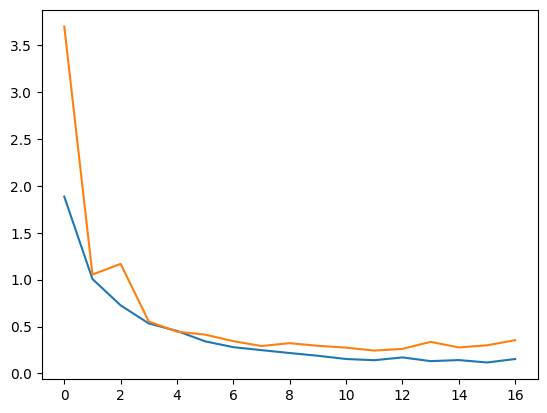

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

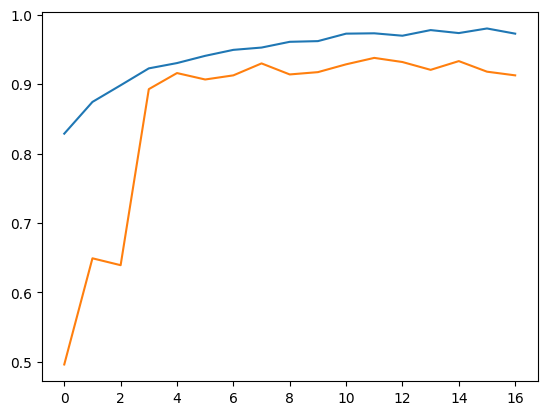

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
model = tf.keras.models.load_model('/content/mask_model.h5')
test = '/content/img2.jpeg'
img = image.load_img(test,target_size=((128,128)))
img = image.img_to_array(img)
img = img/255.0
img_array = np.expand_dims(img,axis=0)

model.predict(img_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.07038976]], dtype=float32)

In [ ]:
model.save('mask_model.h5')

# 3. Download the model to your local machine
from google.colab import files
files.download('mask_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save('/content/drive/MyDrive/mask_model.h5')


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.17.0
